In [1]:
import pandas as pd 
import numpy as np
from pprint import pprint

from utils import clean
from matplotlib import pyplot as plt

# **Dataset**

In [2]:
df = pd.read_csv('dataset/reclamos_202109241237.csv')
df.columns

Index(['id', 'nro_litigio', 'pais_recepcion_notificacion', 'moneda',
       'tipo_cambio', 'monto_dano_material_reclamado_ml',
       'monto_dano_moral_reclamado_ml', 'monto_dano_punitivo_ml',
       'monto_dano_moral_punitivo_ml', 'monto_reclamado_total_ml',
       'monto_reclamado_total_usd', 'estado', 'sub_estado',
       'fecha_notificacion', 'probabilidad_perdida', 'monto_riesgo', 'tipo',
       'sub_tipo', 'motivo', 'deleted', 'creado_por', 'fecha_derivacion',
       'fecha_creacion', 'fecha_modificacion', 'fecha_acuerdo',
       'fecha_de_baja', 'reserva_principal', 'usuario_asignado',
       'numero_expediente', 'situacion_en_despegar', 'enviado_a', 'accion',
       'tipo_accion', 'organo', 'tipo_estado', 'producto_reserva_principal',
       'fecha_de_vencimiento', 'pedido_del_cliente',
       'propuesta_aceptada_cliente', 'hechos_segun_despegar',
       'hechos_segun_pasajero', 'pretension_del_cliente',
       'propuesta_de_ofrecimiento'],
      dtype='object')

In [4]:
df = df[[
    'id',
    'nro_litigio',
    'reserva_principal',
    'usuario_asignado',
    'producto_reserva_principal',
    'pedido_del_cliente',
    'propuesta_aceptada_cliente',
    'hechos_segun_despegar',
    'hechos_segun_pasajero',
    'pretension_del_cliente', 
    'propuesta_de_ofrecimiento'
    ]]

In [ ]:
df.head()

,id,nro_litigio,reserva_principal,usuario_asignado,producto_reserva_principal,pedido_del_cliente,propuesta_aceptada_cliente,hechos_segun_despegar,hechos_segun_pasajero,pretension_del_cliente,propuesta_de_ofrecimiento
0,9ab56c3f-77d7-b5b2-c6a0-60e31efb1fc0,246666,547b3657-82be-b721-8f88-60e31c8f6f8f,969002fa-5f01-a2b9-daf7-60785378acec,FLIGHT,ALTERACAO,NaN,05/07/2021 Apertura de caso\n21/02/2020 Client...,Autoridades del Ministerio de Turismo: Con fec...,cambio,\nSe realizan las verificaciones correspondien...
1,1e4d38a0-3e47-e7d1-14cd-60e3271d8e95,246680,115df3d6-d6bc-91f6-3be7-60e3256550c4,e797067f-7ab5-7bec-e58e-6078531d28e0,FLIGHT,ALTERACAO,NaN,05/07/2021 Alta de litigio \n22-01-2020 Client...,Tengo pasajes comprados para viajar en familia...,Cambio de fechas,"Hemos analizado el caso y en primer lugar, rec..."
2,e9610ad5-681d-adc5-a00c-60e33de80451,246712,7ae5d66c-8080-de06-10a7-60e33d9bb0bc,e797067f-7ab5-7bec-e58e-6078531d28e0,CAR,CANCELAMENTO,NaN,05/07/2021 Apertura de caso \n\n\n19-03-2021 ...,Vengo a interponer formal queja en contra del ...,Devolución,"Hemos analizado el caso y en primer lugar, rec..."
3,ab076235-0849-d2a4-a72b-60e302e7c593,246590,9e26cf73-7638-3b13-ad50-60e3001a7a65,a88d0f37-a1db-b4b7-4c65-601ad12c0db3,FLIGHT,ALTERACAO,NaN,05/07/2021 Apertura de caso\n\nAUDITORIA 05/07...,Agradeciendo de antemano las gestiones en el p...,cambio,"Estimados,\n\nNos comunicamos desde Despegar e..."
4,5099a896-b85f-1884-a4ce-60e308867573,246597,24e8982f-7a6d-4b16-3663-60e306a414be,a88d0f37-a1db-b4b7-4c65-601ad12c0db3,FLIGHT,CANCELAMENTO,NaN,05/07/2021 Alta de litigio.\n\n06/07/2021 AUDI...,PRIMERO.- Con fecha 22 de diciembre del año 20...,\r\nRECLAMACION: La devolución de las siguient...,"Estimados,\n\nNos comunicamos desde Despegar e..."


In [ ]:
pret_cliente = df.pretension_del_cliente.dropna().reset_index(drop=True)
ped_cliente = df.pedido_del_cliente.dropna().reset_index(drop=True)
propuesta = df.propuesta_de_ofrecimiento.dropna().reset_index(drop=True)


# **Análisis**

In [172]:
proporcion = lambda long, data:len(list(filter(lambda x: x<=long, data.apply(lambda x: len(x.split())))))/len(data.apply(lambda x: len(x.split())))

## Propuesta aceptada cliente

<AxesSubplot:title={'center':'propuesta_aceptada_cliente'}>

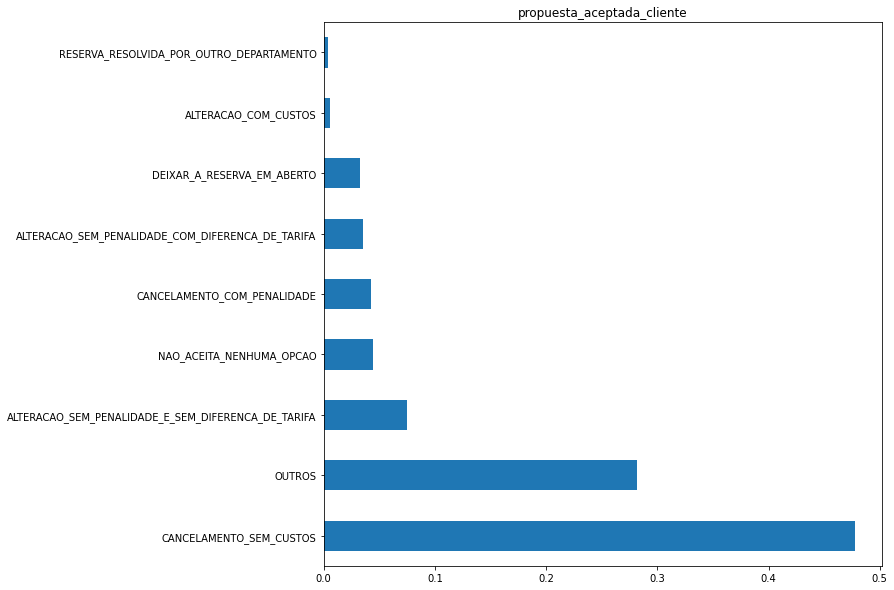

In [95]:
df.propuesta_aceptada_cliente.value_counts(normalize=True).plot(
    kind='barh',
    figsize=(10,10),
    title='propuesta_aceptada_cliente',
    )

## Reserva principal frecuencia de repetción
el relitigio mínimo de 2 se da 818 veces

In [71]:
reserva_ppal = df.reserva_principal.value_counts().values#.plot(kind='barh', figsize=(10,10))

In [124]:
reserva_ppal_freq = [(reserva_ppal.tolist().count(i+1),i+1) for i in range(reserva_ppal.max())]
reserva_ppal_freq

[(13716, 1), (818, 2), (91, 3), (19, 4), (10, 5), (1, 6)]

## Número de litigio
es el valor único en la tabla para cada caso

In [8]:
df.nro_litigio.value_counts()

246666    1
259195    1
259181    1
259175    1
259183    1
         ..
253089    1
253090    1
253092    1
253093    1
264363    1
Name: nro_litigio, Length: 17115, dtype: int64

## Usuario asignado
Para un posterior análisis si existe algún sesgo o problemática con un usuario dado

<AxesSubplot:title={'center':'usuario_asignado'}, ylabel='Frequency'>

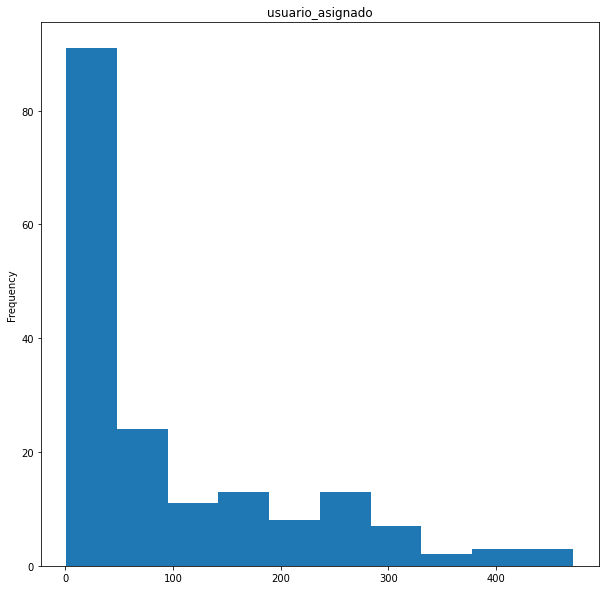

In [125]:
df.usuario_asignado.value_counts().plot(
    kind='hist',
    figsize=(10,10),
    title='usuario_asignado'
    )

## Producto reserva principal

<AxesSubplot:title={'center':'producto_reserva_principal'}>

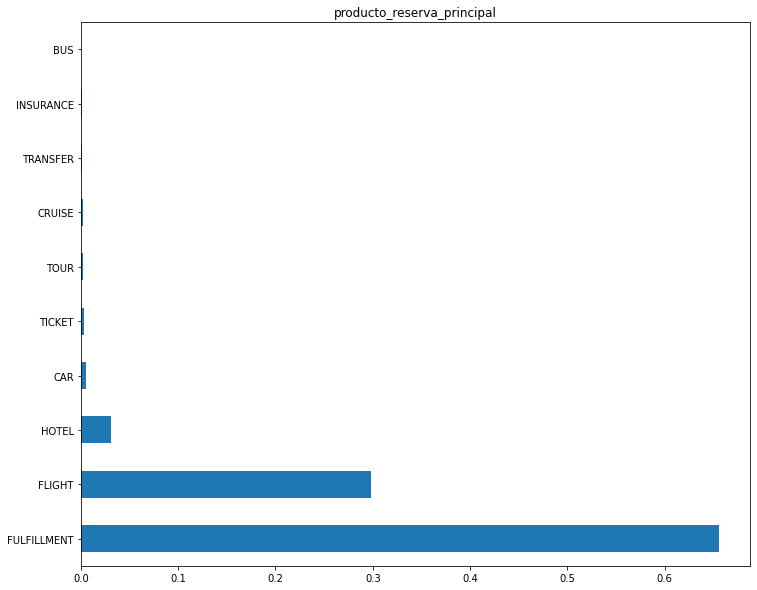

In [126]:
df.producto_reserva_principal.value_counts(normalize=True).plot(
    kind='barh',
    figsize=(12,10),
    title='producto_reserva_principal'
    )

## Pedido del cliente

<AxesSubplot:title={'center':'pedido_del_cliente'}>

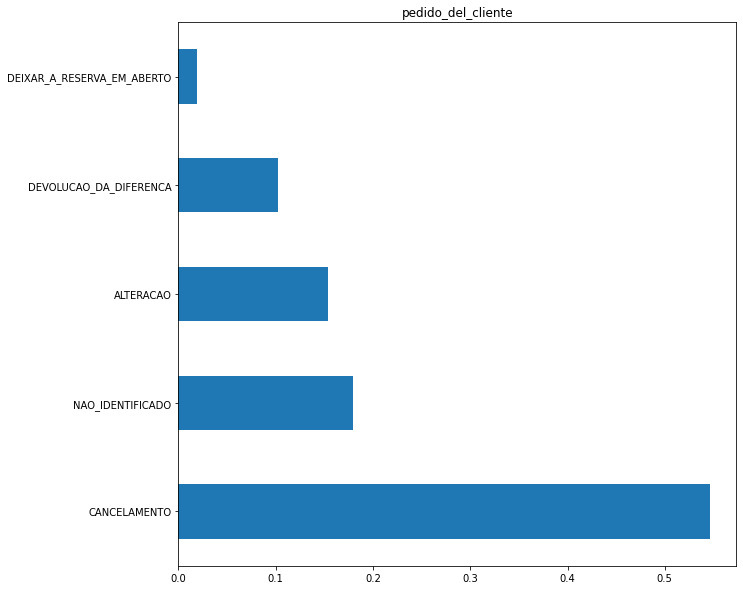

In [99]:
df.pedido_del_cliente.value_counts(normalize=True).plot(
    kind='barh',
    figsize=(10,10),
    title='pedido_del_cliente'
    )

## Propuesta aceptada por el cliente

<AxesSubplot:title={'center':'propuesta_aceptada_cliente'}>

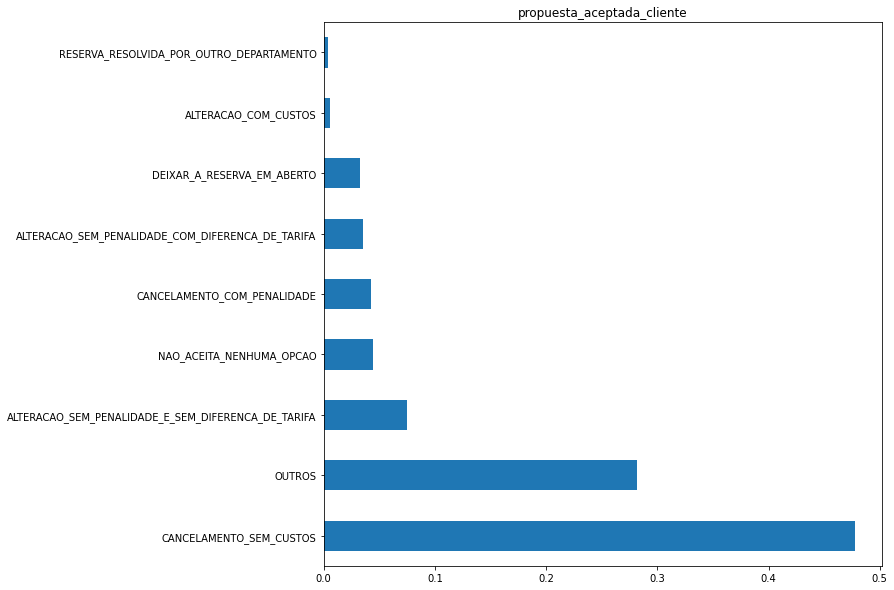

In [100]:
df.propuesta_aceptada_cliente.value_counts(normalize=True).plot(
    kind='barh',
    figsize=(10,10),
    title='propuesta_aceptada_cliente'
    )

In [79]:
df[['pedido_del_cliente','propuesta_aceptada_cliente','pretension_del_cliente']].dropna()

,pedido_del_cliente,propuesta_aceptada_cliente,pretension_del_cliente
12,CANCELAMENTO,OUTROS,DEVOLUCIÓN DEL PAGO INICIAL DE 12.767
18,CANCELAMENTO,OUTROS,"SOLICITA LA DEVOLUCIÓN DEL VALOR DE SU BOLETO,..."
37,CANCELAMENTO,CANCELAMENTO_SEM_CUSTOS,SOLICITA LA DEVOLUCIÓN DEL MONTO PAGADO (US$ 8...
41,DEIXAR_A_RESERVA_EM_ABERTO,OUTROS,Nuevas fechas de viaje o la devolución de nues...
46,CANCELAMENTO,OUTROS,Devolución al 100%
...,...,...,...
17091,DEVOLUCAO_DA_DIFERENCA,OUTROS,Requer devolução dos valores pagos e indenizaç...
17092,DEVOLUCAO_DA_DIFERENCA,OUTROS,Requer devolução dos valores pagos e indenizaç...
17094,DEVOLUCAO_DA_DIFERENCA,OUTROS,Requer devolução dos valores pagos e indenizaç...
17095,DEVOLUCAO_DA_DIFERENCA,OUTROS,Requer devolução dos valores pagos e indenizaç...


## Pretención del cliente

In [68]:
df.pretension_del_cliente.value_counts()

Cancelamento da compra/serviço com restituição do valor pago                                                                                                                                                                                                                                                                                     584
Devolução proporcional/total do valor cobrado/pago                                                                                                                                                                                                                                                                                               493
Requer indenização por danos morais e materiais.\r\n                                                                                                                                                                                                                                                                          

In [128]:
pprint(propuesta.apply(clean.general).sample(5).values)

array(['proposta decolar quais as opções para solucionar o problema na reserva do cliente conforme sistema não houve contatos do passageiro ficando impossibilitado de acionar na reserva do cliente alteração realizada de forma direta com o provedor aereo latam perdendo o controle do bilhete na decolar e possivel realizar alguma devolução não conforme informado pelo passageiro alterações oferecidas pela cia aerea aceitas pelo passageiro confirmando assim a viagem serviço aereo contratado utilizado ha alguma gestão que o cliente deve realizar não houve contatos do passageiro quais as orientações para o escritorio realizar a tratativa não oferecer acordo responsabildiade do passageiro devido alteração de ultima hora a decolar perdeu o acesso no bilhete aereo contratado sendo a alteração feita de forma direta com o provedor aereo contratadao latam passageiro aceita alteração oferecida cumprindo assim com a viagem',
       'proposta decolar quais as opções para solucionar o problema na reser

In [129]:
pprint(pret_cliente.apply(clean.general).sample(10).values)

array(['devolver el dinero devolver el dinero www sernac cl',
       'requer indenização por danos morais e materiais',
       'solicito o imediato ressarcimento das passagens aereas que comprei em canceladas em menos de horas referente a reserva consulta ca pois nesse periodo ainda não havia justificativa para a empresa retardar o reembolso ja que foi antes da pandemia a empresa se apropriou indevidamente do meu dinheiro sem qualquer justificativa',
       'solicito reembolso total dos valores pagos na reserva',
       'requer devolução dos valores pagos e indenização por danos morais',
       'devolucion dinero rapidez en el pago www sernac cl',
       'solucion solicitada que me devuelvan los del hotel que cancele solucion solicitada no hay otra solucion',
       'requer devolução dos valores pagos e indenização por danos morais',
       'me devuelvan el valor pagado www sernac cl',
       'gostaria do reembolso total de ambos pacotes não quero mais remarcar'],
      dtype=object)


**Toamndo 50 palabras para la pretención del cliente tenemos el 90% de los casos**

In [114]:
pret_cliente.apply(lambda x: len(x.split())).describe()

count    17105.000000
mean        20.945630
std         31.009618
min          1.000000
25%          5.000000
50%         10.000000
75%         23.000000
max        537.000000
Name: pretension_del_cliente, dtype: float64

In [122]:
len(list(filter(lambda x: x<=50, pret_cliente.apply(lambda x: len(x.split())))))/len(pret_cliente.apply(lambda x: len(x.split())))

0.9069277988892137

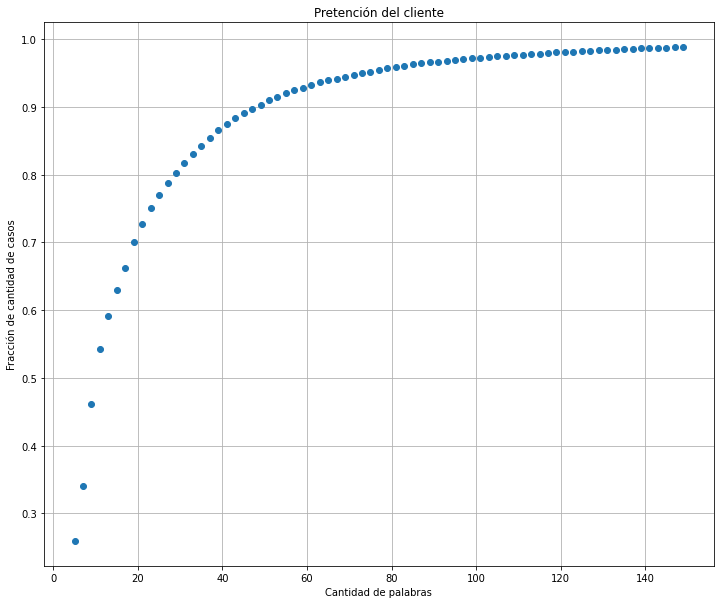

In [171]:
plt.figure(figsize=(12,10))
plt.grid()
plt.title('Pretención del cliente')
plt.ylabel('Fracción de cantidad de casos')
plt.xlabel('Cantidad de palabras')
plt.plot(list(range(5,150,2)), [proporcion(i, pret_cliente) for i in range(5,150,2)],'o')


## Propuesta de ofrecimiento

**Toamndo 200 palabras para la pretención del cliente tenemos el 90% de los casos**

In [132]:
pprint(propuesta.apply(clean.general).sample(5).values)

array(['validando el caso cliente tiene una apertura de tickets y en este caso la cancelacion es bajo regulacion no se asegura devolucion del les sugerimos citar a la aerolinea para que brinde ofrecimiento',
       'pax deve aguardar ate meses a partir da data de cancelamento para receber o reembolso integral referente a passagem aerea de r a quantia de r equivalente a taxa du nos iremos devolver por acordo',
       'proposta decolar quais as opções para solucionar o problema na reserva do cliente se ja foi realizado o que o cliente pediu informar a reserva esta vencida não ha e possivel realizar alguma devolução por qual valor informar como o cliente receberia os valores e prazo não ha alguma gestão que o cliente deve realizar não quais as orientações para o escritorio realizar a tratativa o cliente estava nos enviando datas sem disponibilidade com a cia portanto as solicitações de alteraçao foram canceladas repetidamente a reserva esta vencida de acordo com a cia poderia ser alterada

In [134]:
propuesta.apply(lambda x: len(x.split())).describe()

count    16653.000000
mean        91.885426
std        108.436420
min          0.000000
25%         35.000000
50%         65.000000
75%        113.000000
max       4106.000000
Name: propuesta_de_ofrecimiento, dtype: float64

In [169]:
proporcion(200,propuesta)

0.9082447607037771

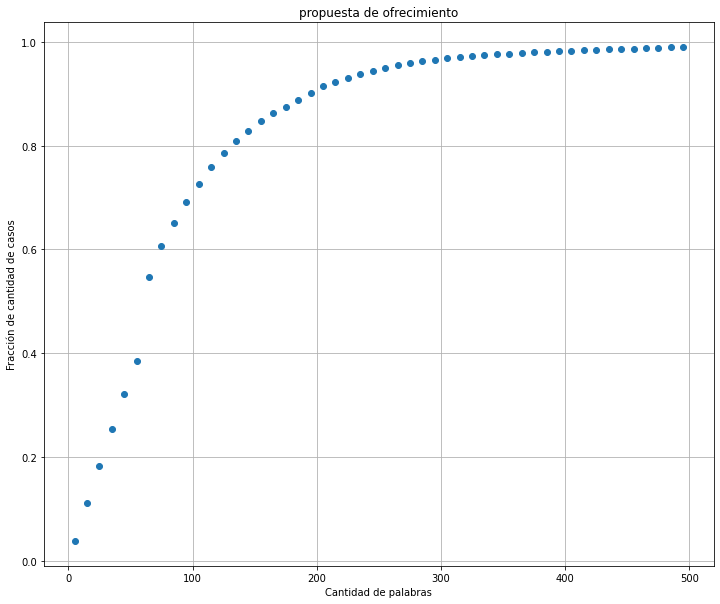

In [170]:
plt.figure(figsize=(12,10))
plt.grid()
plt.title('propuesta de ofrecimiento')
plt.ylabel('Fracción de cantidad de casos')
plt.xlabel('Cantidad de palabras')
plt.plot(list(range(5,500,10)), [proporcion(i, propuesta) for i in range(5,500,10)],'o')


## Hechos segun despegar
en el 90% de los casos se toman 16 acciones para resolver un problema

In [174]:
import re 

In [190]:
pattern_date = re.compile(r'\d{2}(?:\/|\-|\\)\d{2}(?:\/|\-|\\)\d{2,4}')
hechos_segun_despegar = df.hechos_segun_despegar.dropna().apply(lambda x: list(filter(lambda y: len(y.split())>1, map(clean.general,re.split(pattern_date, x)))))

<AxesSubplot:title={'center':'Cantidad de acciones por hecho segun despegar'}>

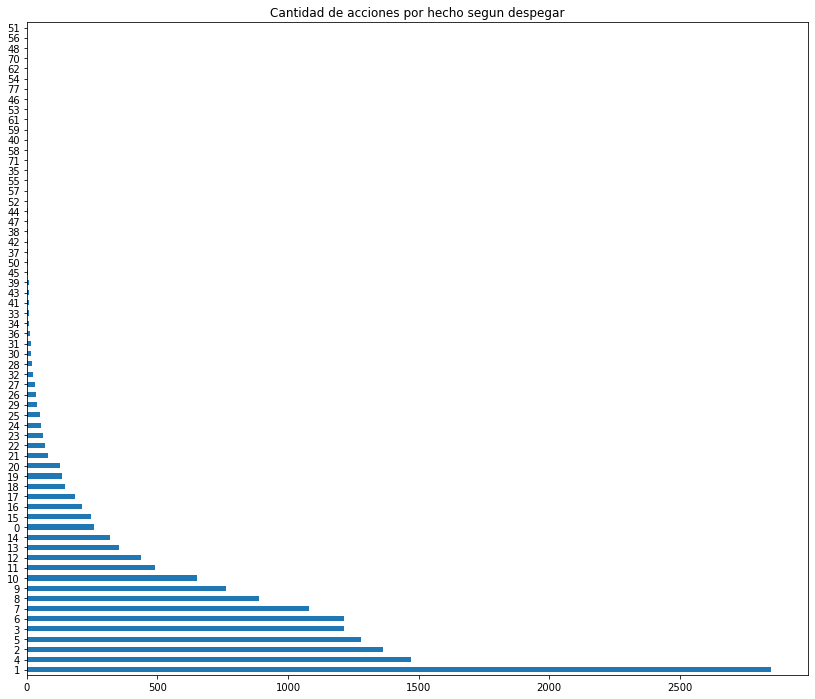

In [236]:
hechos_segun_despegar.apply(len).value_counts().plot(
    kind='barh',
    figsize=(14,12),
    title='Cantidad de acciones por hecho segun despegar',
    )

In [227]:
hechos_segun_despegar.apply(len).describe()

count    16292.000000
mean         6.834950
std          6.366631
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         77.000000
Name: hechos_segun_despegar, dtype: float64

In [237]:
len(list(filter(lambda x: x<16, hechos_segun_despegar.apply(len))))/len(hechos_segun_despegar)

0.9136999754480727